In [1]:
#setting up imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
%matplotlib inline

In [2]:
#finding the file the data is stored in
datafile = "C:\\Users\\gfpet\\OneDrive\\scientific programing in python homework\\homework\\labdata2.csv"

In [3]:
#loading in the data from the file
data = np.genfromtxt(datafile, delimiter=",", skip_header=4, unpack=True)

In [4]:
#extracting the lengths and measured data from the data set
length = [data[0,0], data[1,0], data[2,0], data[3,0], data[4,0], data[5,0]]
period2 = data[0,1:]
period3 = data[1,1:]
period4 = data[2,1:]
period5 = data[3,1:]
period75 = data[4,1:]
period1 = data[5,1:]
periods = [period2, period3, period4, period5, period75, period1]

In [5]:
#setting up some useful variables
avg2 = 0
avg3 = 0
avg4 = 0
avg5 = 0
avg75 = 0
avg1 = 0
n = 1
total = 0
averages = [avg2,avg3,avg4,avg5,avg75,avg1]
avgsqrd = [0,0,0,0,0,0]

In [6]:
#calculating the averages and the squares of the averages for each of the pendulum lengths
n = 0
#using a loop to work through the data for each length value
while n < 6:
    current = periods[n]
    m = 0
    o = 0
    #using a loop to sum all real values together and ignore any blank values
    while m < 9:
        if 0<current[m]<5:
            total = total + current[m]
            #counting how many values have been used to calculate the average value
            o = o + 1
        else:
            pass
        m = m + 1
    avg = total / o
    #comiling all the average values into one list
    averages[n] = avg
    n = n + 1
    total = 0
n = 0
#using a loop to square all the individual average values and compile them all into a second list
while n < 6:
    avgsqrd[n] = averages[n]**2
    n = n + 1

In [7]:
#calculating the errors for each of the sets of data for each pendulum length
errs = [0,0,0,0,0,0]
n = 0
#using a loop to calculate the errors one by one
while n < 6:
    current = periods[n]
    errs[n] = 2 * averages[n] * ((current.max() - current.min()) / 2)
    n = n + 1
print(errs)

[0.8855674285714286, 1.2470995, 1.78015775, 0.5647847777777778, 3.0539460000000007, 4.081884857142858]


[(0.0, 1.04), (0.0, 8.443287595089286)]

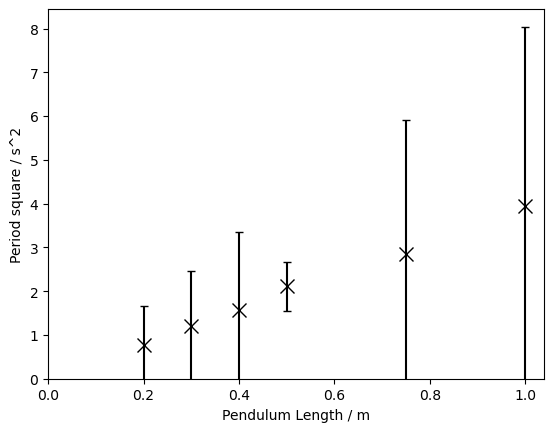

In [8]:
#plotting the data on a graph with their respective error bars
fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(length, avgsqrd, errs, linestyle='', color='k', marker='x',markersize=10, capsize=3, label='Pendulum data')
ax.set(xlabel = "Pendulum Length / m", ylabel = "Period square / s^2")
ax.set(xlim = 0.0, ylim = 0.0)

In [9]:
#creating a function to return the y values of a straight line given y=mx+c
def straightline(x,m,c):
    return m*x+c

In [10]:
#calculating the gradient and y-intercept for the straight line fit
from scipy.optimize import curve_fit
initial_guess = (1.0,1.0)
bestfit, cov = curve_fit(straightline, length, avgsqrd, p0 = initial_guess , sigma = errs, absolute_sigma = True)
grad , yint = bestfit
print(grad, yint)

4.24062799997961 -0.04848838530082733


In [11]:
#calculating and printing the error in the gradient and y-intercept for the straight line fit
graderr = cov[0,0]**0.5
yinterr = cov[1,1]**0.5
print("The error in the gradient is +-", graderr, "and the error in the y-intercept is +-", yinterr)

The error in the gradient is +- 2.85484154918141 and the error in the y-intercept is +- 1.2512493494067567


In [12]:
#creating a function to calculate the theoretical period of a pendulum given its length and the gravitational field strength
def pendulum_period(L, g = sc.g):
    return (4*(sc.pi**2)*L)/g

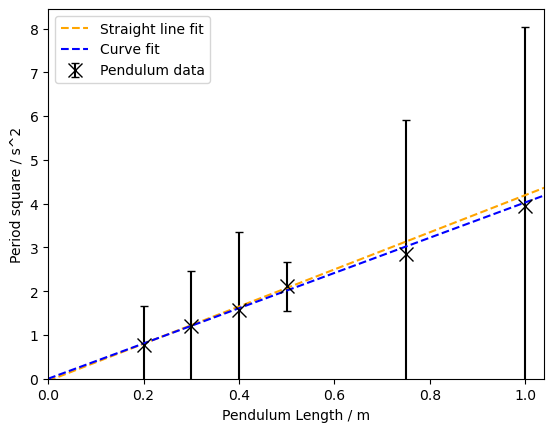

In [13]:
#plotting both the straight line fit and the curve fit on the figure
xvals = np.linspace(0,2)
ax.plot(xvals , straightline(xvals,grad,yint), linestyle = "--", label = "Straight line fit", color = "orange")
ax.plot(xvals, pendulum_period(L = xvals), linestyle = "--", label = "Curve fit", color = "blue")
ax.legend()
fig